# Harmonic Analysis 
- Discrete Fourier Transform

In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt  

(678, 768, 3)

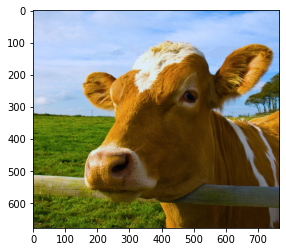

In [11]:
im = cv2.imread('pixels/cow.jpg')[:,:,::-1]
plt.imshow(im);
im.shape

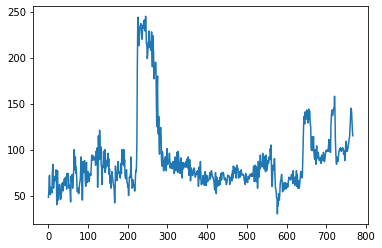

In [19]:
signal = im[400,:,0]  # a 1D signal for experiments
plt.plot(signal); 

Fourier basis is orthogonal.

In [78]:
N = 768
periods = np.arange(N)
fbasis = []
for p in periods: # given frequency
    basis = []
    f = p / N #1./p if p != 0 else 0 
    for i in range(N): # time/space index 
        x = np.cos(i * np.pi * 2 * f)
        y = np.sin(i * np.pi * 2 * f)
        basis.append(x + y* 1j)
    fbasis.append(basis)
fbasis = np.array(fbasis) / np.sqrt(N)  # np.sqrt(N) is for magnitude scaling

Now we have $N$ vectors of size $N$.

In [75]:
fbasis.shape 

(768, 768)

Check orthogonality

In [77]:
for i in range(N):  # mag = 1
    r = np.dot(fbasis[i], np.conjugate(fbasis[i]))
    m = np.absolute(r)
    if np.abs(1-m) > 1E-10:
        print(i, r)

for i in range(N): # orthogonal
    for j in range(i+1, N):
        r = np.dot(fbasis[i], np.conjugate(fbasis[j]))
        if np.absolute(r) > 1E-10:
            print(i, j, r)
print('orthognality check, finished.')

finished.


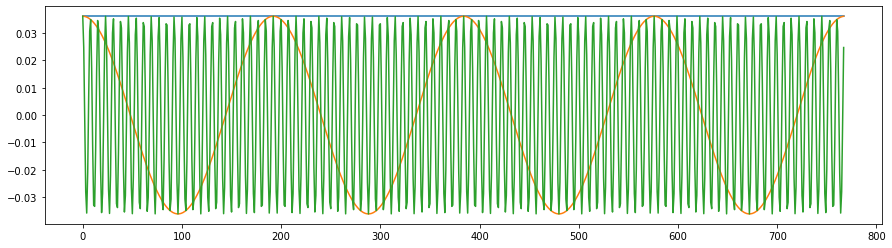

In [79]:
plt.figure(figsize=(15,4))
plt.plot(np.real(fbasis[0]))
plt.plot(np.real(fbasis[4]))
plt.plot(np.real(fbasis[100]))


Project `signal` on to the fourier basis.

In [80]:
fsignal = np.dot(fbasis, signal)
fsignal.shape 

(768,)

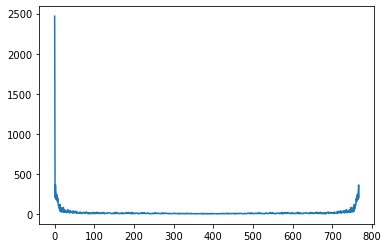

In [81]:
mag = np.absolute(fsignal)
plt.plot(mag)

Reconstruction of the original signal.

reconstruction rms =  7.776776097410385e-12


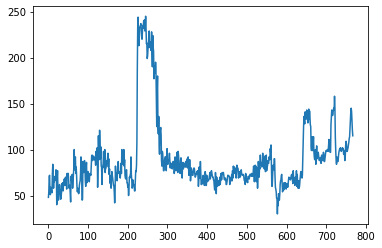

In [87]:
rec = np.dot(np.conjugate(fbasis), fsignal)
r = np.real(rec)
i = np.imag(rec) 
plt.plot(r)
err = np.sqrt( ((r - signal)**2).mean() )
print('reconstruction rms = ', err)

Even symmetry of $F$:

- Input signal is real and $F$ is even symmetric: $F^*(-1) = F(1)$
- For even $N$, $F_0$ and $F_{N/2}$ are real-valued, and the remainder of the DFT is completely specified by just $N/2-1$ complex numbers.
  - $N=0$: $F_0$ is a real number since $e^{-\frac{2\pi}{N}k}$ with $k=0$ is $1$. 
  - $N=N/2$: $F_{N/2}$ is real because $e^{-\frac{2\pi}{N}k} = -1$ at $k=N/2$, so is $F_{-N/2}$.
- Because of this even symmetry, we use the interval $[-N/2, N/2-1]$ by putting $k=0$ at the center.

In [92]:
fsignal[-1], fsignal[1]

((-24.861020819562384-204.83772987120238j),
 (-24.861020819668173+204.83772987118j))

In [93]:
fsignal[N//2 - 1], fsignal[N//2], fsignal[N//2 + 1]

((-0.7534342011419497-1.3135436710717272j),
 (5.412658773653675-8.316431246131971e-12j),
 (-0.7534342011451471+1.313543671057559j))

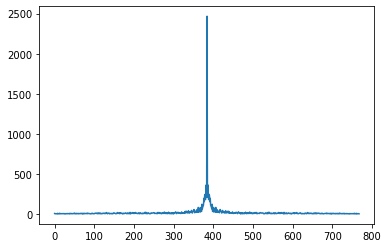

In [99]:
fs2 = np.empty_like(fsignal)
fs2[N//2:] = fsignal[:N//2]
fs2[:N//2] = fsignal[N//2:]
plt.plot(np.absolute(fs2));

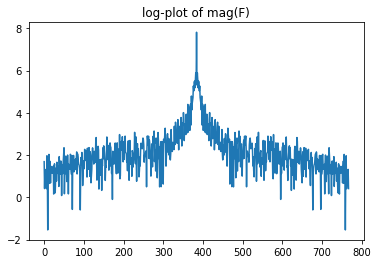

In [102]:
plt.plot(np.log(np.absolute(fs2)));
plt.title('log-plot of mag(F)');

Smoothing by removing high frequency terms.

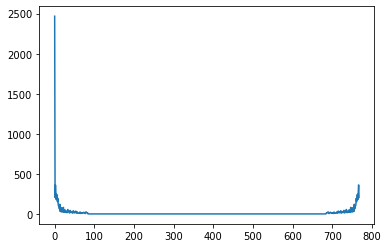

In [126]:
width2 = 300
interval = range(N//2-width2,N//2+width2)
fprocessed = fsignal.copy() 
fprocessed[interval] = 0
plt.plot(np.absolute(fprocessed));

reconstruction rms =  7.226494059659529


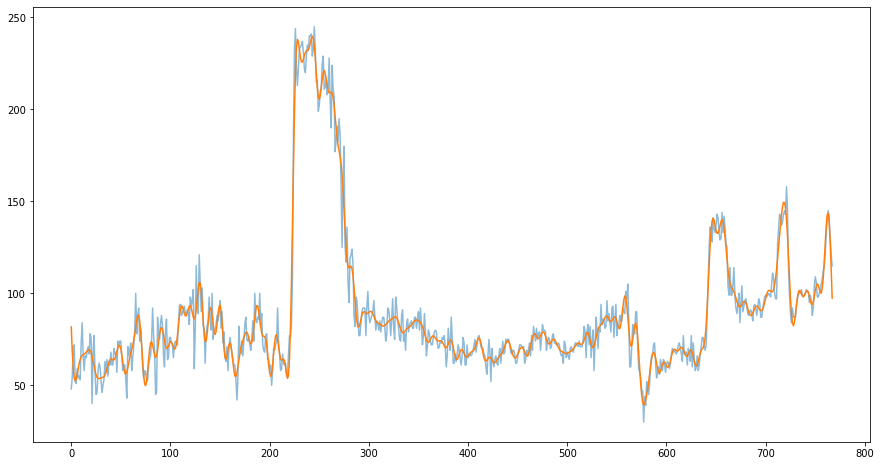

In [127]:
rec = np.dot(np.conjugate(fbasis), fprocessed)
r = np.real(rec)
i = np.imag(rec) 
err = np.sqrt( ((r - signal)**2).mean() )

plt.figure(figsize=(15,8))
plt.plot(signal, alpha=0.5)
plt.plot(r)
print('reconstruction rms = ', err)

Reconstruction with various window size.

reconstruction rms =  37.88580582278601 window = 766 nsignal=2
reconstruction rms =  17.163446266521493 window = 748 nsignal=20
reconstruction rms =  12.662760552858767 window = 728 nsignal=40
reconstruction rms =  8.65954789246297 window = 668 nsignal=100


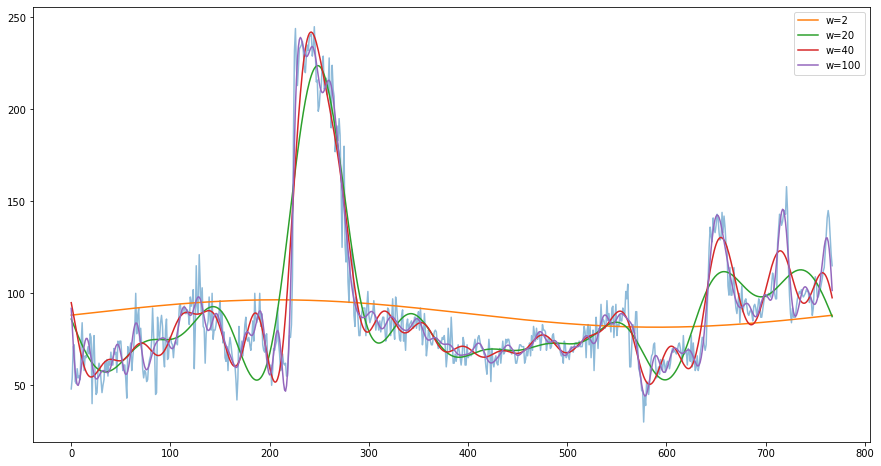

In [137]:
plt.figure(figsize=(15,8))
plt.plot(signal, alpha=0.5)

width2values = [N//2-1, N//2-10, N//2-20, N//2-50]
for width2 in width2values:
    interval = range(N//2-width2,N//2+width2)
    fprocessed = fsignal.copy() 
    fprocessed[interval] = 0

    rec = np.dot(np.conjugate(fbasis), fprocessed)
    r = np.real(rec)
    i = np.imag(rec) 
    err = np.sqrt( ((r - signal)**2).mean() )

    plt.plot(r, label=f'w={N-2*width2}')
    print('reconstruction rms = ', err, f'window = {2*width2}', f'nsignal={N-2*width2}')
plt.legend()

reconstruction rms =  37.88580582278601 window = 766 nsignal=2
reconstruction rms =  33.93693622265668 window = 764 nsignal=4
reconstruction rms =  30.468599988164378 window = 762 nsignal=6
reconstruction rms =  26.133054942084993 window = 758 nsignal=10
reconstruction rms =  17.163446266521493 window = 748 nsignal=20


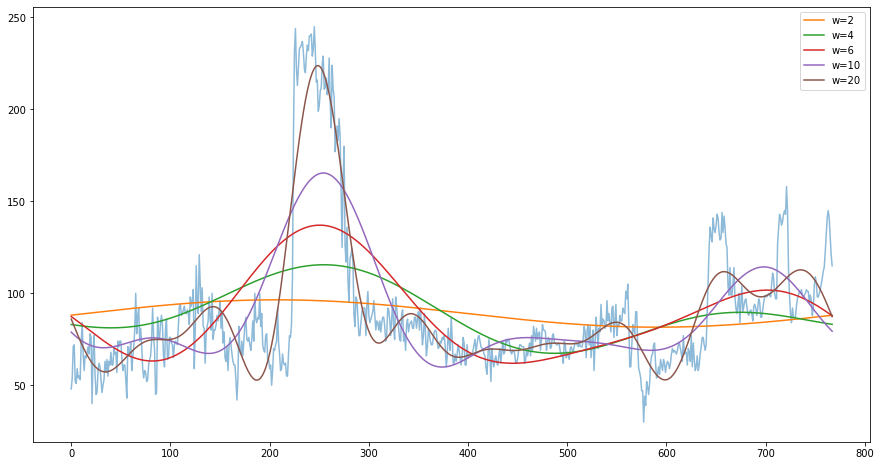

In [139]:
plt.figure(figsize=(15,8))
plt.plot(signal, alpha=0.5)

width2values = [N//2-1, N//2-2, N//2-3, N//2-5, N//2-10]
for width2 in width2values:
    interval = range(N//2-width2,N//2+width2)
    fprocessed = fsignal.copy() 
    fprocessed[interval] = 0

    rec = np.dot(np.conjugate(fbasis), fprocessed)
    r = np.real(rec)
    i = np.imag(rec) 
    err = np.sqrt( ((r - signal)**2).mean() )

    plt.plot(r, label=f'w={N-2*width2}')
    print('reconstruction rms = ', err, f'window = {2*width2}', f'nsignal={N-2*width2}')
plt.legend()

FFT with numpy

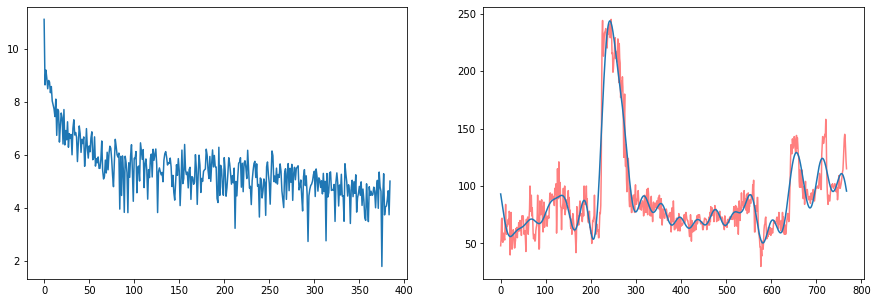

In [166]:
rft = np.fft.rfft(signal)
rftcopy = rft.copy()
rft[20:] = 1e-10 # remove high frequency terms
smooth = np.fft.irfft(rft)

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(np.log(np.absolute(rftcopy)))
axes[1].plot(signal, alpha=0.5, color='red')
axes[1].plot(smooth);


2D Discrete Fourier Transform

Reconstruction Error RMS:  2.1522401700130885e-16


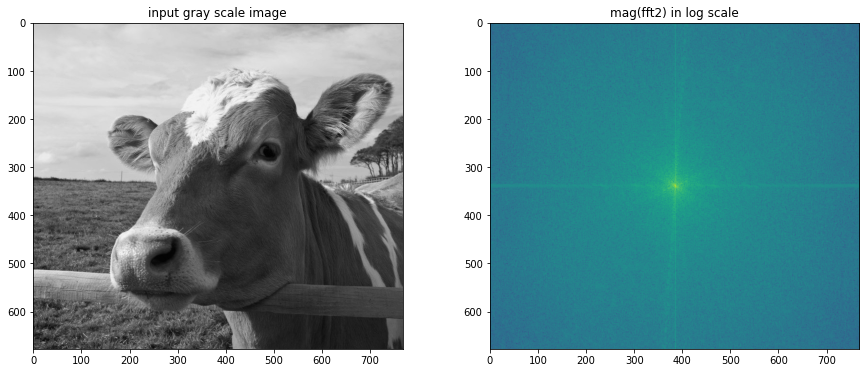

In [194]:
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) / 255
fft2 = np.fft.fft2(gray)
rec = np.fft.ifft2(fft2)

rms = np.sqrt(np.power(np.abs(gray-rec),2).mean())
print('Reconstruction Error RMS: ', rms)

# display 
fft2shift = np.fft.fftshift(fft2) # shift to center
m = np.abs(fft2shift)
fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].imshow(gray, cmap='gray'); axes[0].set(title='input gray scale image')
axes[1].imshow(np.log10(m)); axes[1].set(title='mag(fft2) in log scale');

678 768
diff max=0.45302752865925583


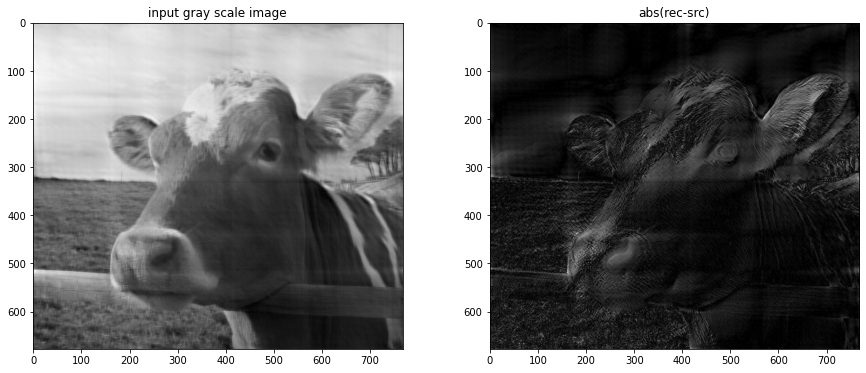

In [239]:
rows, cols = gray.shape
print(rows, cols)
fft2 = np.fft.fft2(gray)
# fft2[rows//10:, cols//10] = 0  # remove high frequency term
K = 50
fft2[K:, K:] = 0
rec = np.fft.ifft2(fft2)
rec = np.abs(rec)  # reconst.

diff = np.abs(rec - gray)  # error
print(f'diff max={diff.max()}')
diff = np.clip(diff*255, 0, 255).astype(np.uint8)
fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].imshow(rec, cmap='gray'); axes[0].set(title='input gray scale image')
axes[1].imshow(diff, cmap='gray'); axes[1].set(title='abs(rec-src)');

End.